<a href="https://www.kaggle.com/code/quratulain20/simple-linear-regression?scriptVersionId=192238000" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(30, 3)

In [9]:
df = df.drop('Unnamed: 0', axis=1)

Text(0, 0.5, 'Salary')

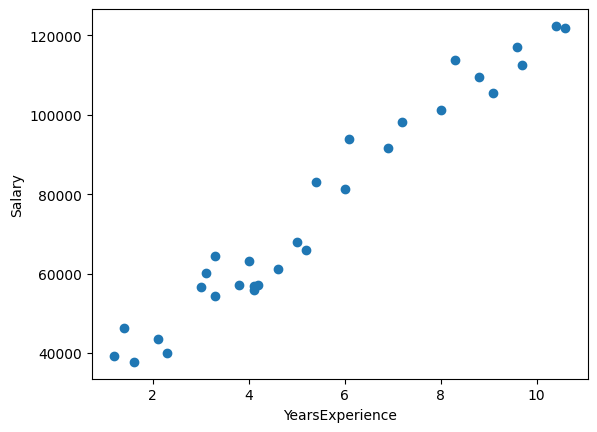

In [10]:
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [65]:
X = df.iloc[:,0:1].values
y = df.iloc[:,-1].values

In [66]:
X.shape , y.shape

((30, 1), (30,))

In [67]:
X


array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [68]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state = 2)


In [70]:
X_train.shape , y_train.shape

((24, 1), (24,))

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [72]:
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
lr.predict(X_test[2].reshape(1,1))

array([67457.3101364])

In [20]:
y_test.iloc[2]

61112.0

Text(0, 0.5, 'Salary')

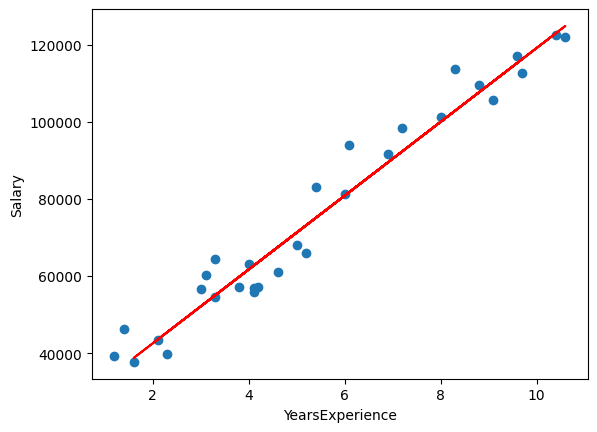

In [83]:
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
plt.plot(X_train, lr.predict(X_train), color= 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [22]:
m = lr.coef_
m

array([9569.58688543])

In [23]:
b = lr.intercept_
b

23437.21046340505

# Linear Regression using OOP

In [34]:
# mean of our inputs and outputs
X_train_mean = np.mean(X_train)
y_train_mean = np.mean(y_train)
#total number of values
n = len(X_train)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [36]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [37]:
X.shape ,  y.shape

((30,), (30,))

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state = 2)

In [39]:
X_train.shape

(24,)

In [51]:
class SimpleLr:
    
    def __init__(self):
        self.m = None
        self.b = None
    
    def fit(self, X_train, y_train):
        x_mean = X_train.mean()
        y_mean = y_train.mean()
        
        numerator = 0
        denominator = 0
        for i in range(len(X_train)):
            numerator += (X_train[i] - x_mean) * (y_train[i] - y_mean)
            denominator += (X_train[i] - x_mean) ** 2
        
        self.m = numerator / denominator
        self.b = y_mean - self.m * x_mean
        
        print(self.m)
        print(self.b)

    def predict(self, X_test):
        print(X_test)
        return self.m * X_test + self.b

In [52]:
slr = SimpleLr()

In [53]:
slr.fit(X_train , y_train)

9569.586885432866
23437.21046340505


In [54]:
slr.predict(X_test[2])

4.6


67457.31013639623

In [55]:
y_test[2]

61112.0

[ 8.3  3.1  2.1  6.9  3.   9.7  4.1  2.3  4.   5.2 10.4  9.1  5.4  1.6
  3.3  9.6  8.8  6.   4.1  8.  10.6  4.2  5.   3.3]


Text(0, 0.5, 'Salary')

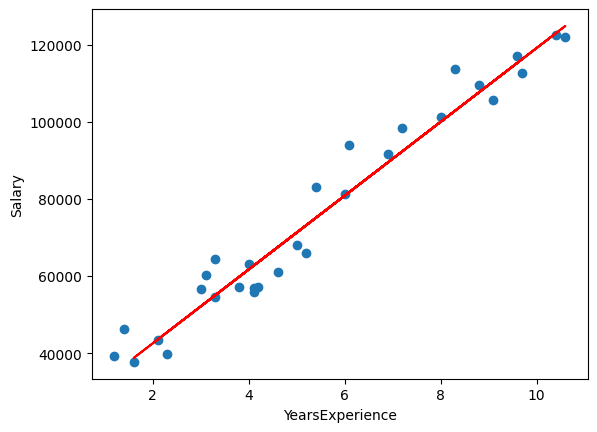

In [56]:
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
plt.plot(X_train, slr.predict(X_train), color= 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

# Model Evaluation

In [60]:
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

In [84]:
y_pred = lr.predict(X_test)

In [88]:
y_pred

array([36834.63210301, 34920.71472592, 67457.3101364 , 59801.64062805,
       92338.23603852, 81811.69046455])

In [87]:
y_test

array([46206., 39344., 61112., 57190., 98274., 93941.])

In [89]:
print ('MSE' , mean_squared_error(y_test,y_pred))
print ('MAE' , mean_absolute_error(y_test,y_pred))
print ('R2-Score' , r2_score(y_test,y_pred))
print ('RMSE' , np.sqrt(mean_squared_error(y_test,y_pred)))


MSE 56137509.99782566
MAE 6802.779572073905
R2-Score 0.8886956733784561
RMSE 7492.49691343451
